In [3]:
import numpy as np
import math
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import glob
import copy
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy import optimize
from dateutil.parser import parse
from scipy.stats import poisson, norm
import datetime
from scipy.signal import find_peaks
from matplotlib import colors

In [4]:
angle=np.arange(8.000964,120.013032, 0.5041 )
#print(angle)

In [35]:
data= open('NaClmoido.dat', 'r') 
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []

for line in data:
    p = line.split()
    x0.append(float(p[0]))
    x1.append(float(p[1]))
    x2.append(float(p[2]))
    x3.append(float(p[3]))
    x4.append(float(p[4]))
    x5.append(float(p[5]))
    x6.append(float(p[6]))
    x7.append(float(p[7]))
    x8.append(float(p[8]))
    x9.append(float(p[9]))
   

In [36]:
plt.rcParams.update({
"image.origin": "lower",
"image.aspect": 1,
"text.usetex": True,
"grid.alpha": .5,
}) 
plt.style.use('ggplot')

In [37]:
print(len(x0),len(angle[:-1]))

222 222


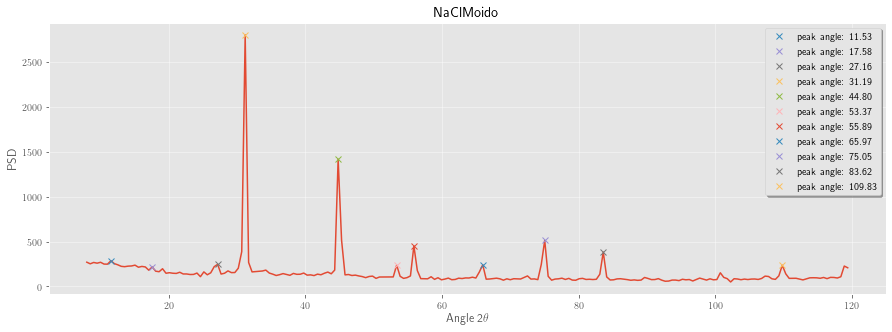

In [79]:
peaks, _ = find_peaks(x0, height=200, threshold=20)
plt.figure(figsize=(15,5))
#plt.plot(angle[:-1],x0)
# plt.plot(angle[:-1],x1)
# plt.plot(angle[:-1],x2)
# plt.plot(angle[:-1],x3)
# plt.plot(angle[:-1],x4)
# plt.plot(angle[:-1],x5)
# plt.plot(angle[:-1],x6)
# plt.plot(angle[:-1],x7)
# plt.plot(angle[:-1],x8)

plt.plot(angle[:-1],x0)
plt.ylabel('PSD')
plt.xlabel('Angle 2$\\theta$')
plt.title('NaClMoido');
for i in peaks: plt.plot(angle[i],x0[i],"x", label="peak angle: {:.2f}".format(angle[i]))
plt.legend( fancybox=True, shadow=True);


In [51]:
angles=[math.radians(angle[i]/2) for i in peaks]
#print(angles)
dAA=[1.54184/(np.sin(i)*2) for i in angles]
print(dAA)


[7.674998441604365, 5.045170462434426, 3.283649382906151, 2.867663464474077, 2.0230270805501243, 1.7166467632496598, 1.6450597518925825, 1.4159935991012058, 1.2657087314247515, 1.156432644858426, 0.9421040428412898]


In [52]:
hkl=[[1,0,0],[1,1,0],[1,1,1],[2,0,0],[2,1,0],[2,1,1],[2,2,0],[3,0,0],[3,1,0],[3,1,1],[2,2,2],[3,2,0],[3,2,1],
     [4,0,0],[4,1,0],[4,1,1],[3,3,1],[4,2,0],[4,2,1],[3,3,2],[4,2,2],[5,0,0]]

In [53]:
m=0
hkl2=[]
for i in hkl:
    j=0
    for j in i: 
        m+=j**2
    hkl2.append(m)
    m=0
print(hkl2)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25]


In [58]:
def m (a, daa):
    return (a/daa)**2
for daa in dAA: 
    print(daa, m(cubic(dAA[3],hkl[3]),daa),round(m(cubic(dAA[3],hkl[3]),daa)), int(m(cubic(dAA[3],hkl[3]),daa)))

    #print(hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa))))
   # print(daa, hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))])

7.674998441604365 0.5584184590190283 1.0 0
5.045170462434426 1.292303941457436 1.0 1
3.283649382906151 3.0507231731932607 3.0 3
2.867663464474077 4.0 4.0 4
2.0230270805501243 8.03735155945017 8.0 8
1.7166467632496598 11.162320286489214 11.0 11
1.6450597518925825 12.15494515908214 12.0 12
1.4159935991012058 16.405662670947443 16.0 16
1.2657087314247515 20.532829724732647 21.0 20
1.156432644858426 24.59663361784532 25.0 24
0.9421040428412898 37.06112709150046 37.0 37


In [59]:
def cubic(d,par):
    return d*np.sqrt(par[0]**2+par[1]**2+par[2]**2)

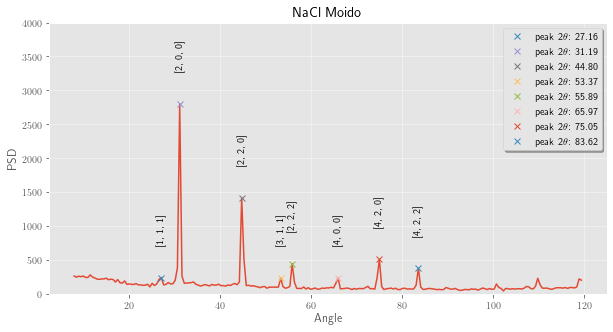

In [106]:
plt.figure(figsize=(10,5))
plt.plot(angle[:-1],x0)
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('NaCl Moido')
plt.ylim(0,4000);
for i in peaks[2:-1]:
    plt.plot(angle[i],x0[i],"x", label="peak 2$\\theta$: {:.2f}".format(angle[i]))
    plt.legend( fancybox=True, shadow=True)
    #print(i)
    if i >100:
        plt.text(angle[i],x0[i]+500,str(hkl[hkl2.index(int(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]),ha='center',rotation=90)
    else:
        plt.text(angle[i],x0[i]+500,str(hkl[hkl2.index(round(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]),ha='center',rotation=90)

In [119]:
a=[]
for i in peaks[2:-1]:
    if i >100:
        print(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))],cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
        a.append(cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
    else:
        a.append(cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
        print(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(round(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))],cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(round(m(cubic(dAA[3],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))

3.283649382906151 [1, 1, 1] 5.687447565435644
2.867663464474077 [2, 0, 0] 5.735326928948154
2.0230270805501243 [2, 2, 0] 5.721984668724067
1.7166467632496598 [3, 1, 1] 5.693473211277179
1.6450597518925825 [2, 2, 2] 5.698654143529208
1.4159935991012058 [4, 0, 0] 5.663974396404823
1.2657087314247515 [4, 2, 0] 5.660421526361538
1.156432644858426 [4, 2, 2] 5.665339803600672


In [124]:
print(a)
print(np.mean(a),np.std(a))

[5.687447565435644, 5.735326928948154, 5.721984668724067, 5.693473211277179, 5.698654143529208, 5.663974396404823, 5.660421526361538, 5.665339803600672]
5.690827780535161 0.025801849514805793


5.735326928948154


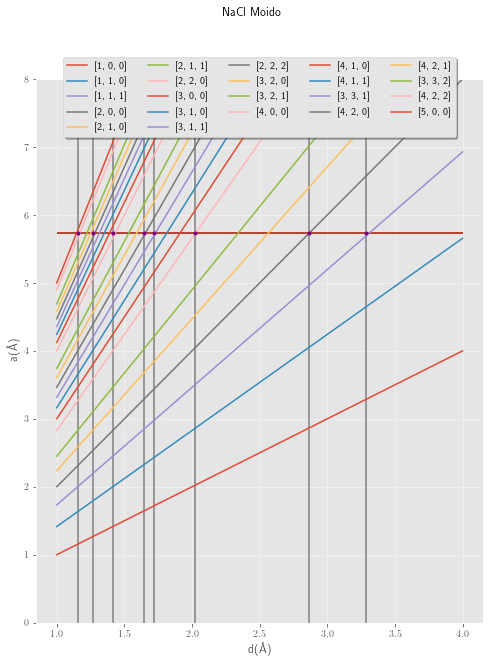

In [110]:
dlista=np.linspace(1,4,1000)
plt.figure(figsize=(8,10))
for i in range(len(hkl)):
    plt.plot(dlista,cubic(dlista,hkl[i]),label=str(hkl[i]))

for i in dAA[2:-1]:
    plt.vlines(i,0,20, colors="tab:gray")
    plt.plot(i,cubic(dAA[3],hkl[3]),'.',c='purple')
    
plt.ylabel("a(\AA)")
plt.xlabel("d(\AA)")
plt.hlines(5.735326928,1,4,  colors="black")
plt.hlines(cubic(dAA[3],hkl[3]),1,4)
plt.suptitle("NaCl Moido")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylim(0,8)

print(cubic(dAA[3],hkl[3]))

In [94]:
!jupyter nbconvert --to html --no-input Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to html
[NbConvertApp] Writing 888485 bytes to Untitled.html
